# Associer des arrondissements à des données communales avec cartiflette

Lino Galiana

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

Cette page est un *work in progress*! Des exemples dans d’autres
langages que `Python` viendront ultérieurement.

Cette page fait partie d’une série de tutoriels illustrant les
fonctionnalités de `cartiflette`. Pour retrouver la liste de ceux-ci,
c’est [ici](../use-case/index.qmd).

</div>

Ce tutoriel vise à illustrer un cas d’usage classique de `cartiflette` :
**récupérer de manière flexible un fonds de carte mélangeant les niveaux
administratifs différents que sont <span class="yellow">communes</span>
et <span class="yellow">arrondissements</span>**.

Ce besoin classique est illustré à travers la construction d’une carte
de la disponibilité de vélibs dans la petite couronne parisienne (Paris
intra-muros et départements limitrophes). L’objectif de ce tutoriel est
de faire une carte du nombre de vélibs au km² dans chaque arrondissement
de Paris intra-muros et chaque commune de la petite couronne. Il
illustre, pas à pas, la manière dont `cartiflette` simplifie la création
de la <a href="#fig-map" class="quarto-xref">Figure 1</a> :

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Pourquoi utiliser cartiflette pour ce type de besoins ?</h3>

-   Beaucoup <span class="yellow">moins de ligne de code</span> à écrire
    :
    -   Réduit le temps nécessaire avant d’obtenir une carte
        exploratoire, ce qui permet de se concentrer sur la construction
        de celle-ci plutôt que les étapes antérieures
    -   Réduit la difficulté à mettre à jour le code ;
-   <span class="yellow">Moins de bande passante</span> et d’espace
    disque utilisé car seule la donnée nécessaire est téléchargée ;
-   <span class="yellow">Moindre besoin d’expertise en SIG</span> car la
    librairie fournit un `GeoDataFrame` prêt à l’emploi ce qui ne
    nécessite pas une connaissance pointue dans le domaine (système de
    projection, format *shapefile*, etc.) ;
-   <span class="yellow">Moins de risque d’erreur</span> que lorsqu’on
    fait soi-même la combinaison de sources à des niveaux administratifs
    différents (accoler le masque des arrondissements à celui des
    communes limitrophes nécessite beaucoup de précautions) ;
-   <span class="yellow">Bénéficier de métadonnées
    supplémentaires</span> sur les communes que les fonds de carte
    `AdminExpress`

</div>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Et Lyon et Marseille ?</h3>

`cartiflette` fournit le même découpage par arrondissement pour les
villes de Lyon et Marseille. Pour cela, il suffit de demander une zone
géographique englobant Lyon et Marseille, par exemple le département du
Rhône ou la région Provence Alpes Côte d’Azur.

</div>

<div class="alert alert-" role="alert">
<h3 class="alert-heading"> Pour en apprendre plus sur le traitement de données géographiques avec Python </h3>

Ce tutoriel présuppose une connaissance minimale de l’écosystème
`Python` pour le traitement de données spatiales. Pour se familiariser à
celui-ci, vous pouvez consulter ce cours d’[Introduction à `Python` pour
la *data
science*](https://pythonds.linogaliana.fr/content/manipulation/03_geopandas_intro.html)
de l’ENSAE ParisTech.

</div>

# 1. Préliminaire: récupération des localisations des stations

Les données Vélib que nous utiliserons sont récupérables directement
avec `GeoPandas`. Il s’agit de la capacité et la localisation des
stations sous la forme de latitude-longitude[1]

[1] Le système de coordonnées WGS84 (*World Geodetic System 1984*) est
un système de référence géodésique utilisé pour représenter les
positions géographiques sur la Terre. Ce système est utilisé par la
plupart des applications GPS et des fournisseurs de tuiles vectorielles
comme `OpenStreetMap`.

In [1]:
import geopandas as gpd

velib_data = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
stations = gpd.read_file(velib_data)

Skipping field coordonnees_geo: unsupported OGR type: 3

Ces données prennent la forme suivante:

et peuvent être localisées sur une carte de la manière suivante:

In [3]:
import folium
from folium.plugins import MarkerCluster

# 1. Calcul du centre de la carte et des bornes sw et ne
stations['lon'] = stations.geometry.x
stations['lat'] = stations.geometry.y
center = stations[['lat', 'lon']].mean().values.tolist()
sw = stations[['lat', 'lon']].min().values.tolist()
ne = stations[['lat', 'lon']].max().values.tolist()

m = folium.Map(location=center, tiles='OpenStreetMap')
marker_cluster = MarkerCluster().add_to(m)

# Add the markers to the MarkerCluster
for i in range(len(stations)):
    folium.Marker(
        location=[stations.iloc[i]['lat'], stations.iloc[i]['lon']],
        popup=stations.iloc[i]['name']
    ).add_to(marker_cluster)

# Fit the map bounds to the markers
m.fit_bounds([sw, ne])
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_301317e37f5e22d6905dd2bf44b9b574 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/leaflet.markercluster.js"></script>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.Default.css"/>
</head>
<body>
 
 
 <div class="folium-map" id="map_301317e37f5e22d6905dd2bf44b9b574" ></div>
 
</body>
<script>
 
 
 var map_301317e37f5e22d6905dd2bf44b9b574 = L.map(
 "map_301317e37f5e22d6905dd2bf44b9b574",
 {
 center: [48.858088887498, 2.341530231587088],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_c39744613a3bae25d5ace304c536d71a = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_c39744613a3bae25d5ace304c536d71a.addTo(map_301317e37f5e22d6905dd2bf44b9b574);
 
 
 var marker_cluster_f23b3a4e51b48f8da1df3e107f2d75af = L.markerClusterGroup(
 {}
 );
 
 
 var marker_d18d232edb8fba9a8721da4a9e5bab07 = L.marker(
 [48.93626891059109, 2.3588666820200914],
 {}
 ).addTo(marker_cluster_f23b3a4e51b48f8da1df3e107f2d75af);
 
 
 var popup_1a369ac795e6922beb5410c3b42f5f0b = L.popup({"maxWidth": "100%"});

 
 
 var html_7d9111f99253ebde4a9a506c7fea2f27 = $(`<div id="html_7d9111f99253ebde4a9a506c7fea2f27" style="width: 100.0%; height: 100.0%;">Basilique</div>`)[0];
 popup_1a369ac795e6922beb5410c3b42f5f0b.setContent(html_7d9111f99253ebde4a9a506c7fea2f27);
 
 

 marker_d18d232edb8fba9a8721da4a9e5bab07.bindPopup(popup_1a369ac795e6922beb5410c3b42f5f0b)
 ;

 
 
 
 var marker_c18c347e51cdb89813c49da73fe2099b = L.marker(
 [48.882428, 2.314002],
 {}
 ).addTo(marker_cluster_f23b3a4e51b48f8da1df3e107f2d75af);
 
 
 var popup_1dfbd2581625110e9a2cdcaea805e735 = L.popup({"maxWidth": "100%"});

 
 
 var html_37622870f99ab4f69602c55891aa1876 = $(`<div id="html_37622870f99ab4f69602c55891aa1876" style="width: 100.0

<br> Nous allons avoir besoin des contours d’arrondissements et de
communes pour deux raisons:

-   Localiser les stations à ce niveau d’analyse par le biais d’une
    [jointure
    spatiale](https://geopandas.org/en/stable/gallery/spatial_joins.html)
    avant de pouvoir les agréger à ce niveau ;
-   Représenter ces données sur une carte présentant Paris intra-muros
    et les villes limitrophes participant au système Vélib.

# 2. Récupérer les contours administratifs officiels l’IGN via `cartiflette`

## 2.1 La récupération des données utilisant `cartiflette`

Les contours administratifs officiels sont produits par
l’[IGN](https://www.ign.fr/) et utilisent le [code officiel géographique
(COG)](https://www.insee.fr/fr/metadonnees/source/serie/s2084) (liste
officielle des entités administratives) produit par l’Insee.

La source la plus simple pour répondre à notre besoin est
[`AdminExpress EXPRESS-COG-CARTO-TERRITOIRE`](https://geoservices.ign.fr/adminexpress).
En l’occurrence, seuls quelques espaces nous intéressent: ce sont les
villes et arrondissements de la petite couronne parisienne (départements
75, 92, 93 et 94).

Avec la fonction `carti_download`, l’import de ces données est assez
transparent:

``` python
from cartiflette import carti_download

# 1. Fonds communaux
contours_villes_arrt = carti_download(
    values = ["75", "92", "93", "94"],
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

# 2. Départements 
departements = contours_villes_arrt.dissolve("INSEE_DEP")
```

Line 6  
4326 est le code du système de représentation WGS84 (le même que celui
des données Vélib). De futures développement de `cartiflette`
permettront de récupérer des données avec d’autres projections,
notamment les systèmes Lambert.

Line 8  
Ici on récupère seulement des départements, l’emprise la plus petite qui
puisse satisfaire notre besoin. Néanmoins, il serait possible d’obtenir
les données à une autre échelle géographique, par exemple la région Ile
de France, en spécifiant les arguments `filter_by="DEPARTEMENT"` et
`values="11"`.

Line 13  
La construction du fonds de carte `departements` se fait simplement avec
la méthode `dissolve`. Il nous sera utile pour contextualiser la carte.

Listing 1: Example d’utilisation de cartiflette

`contours_villes_arrt` est un `GeoDataFrame` classique, il est donc
possible d’appliquer à celui-ci les méthodes usuelles de `GeoPandas` par
exemple la méthode `dissolve` ci-dessus. Le masque obtenu pour notre
carte est celui-ci

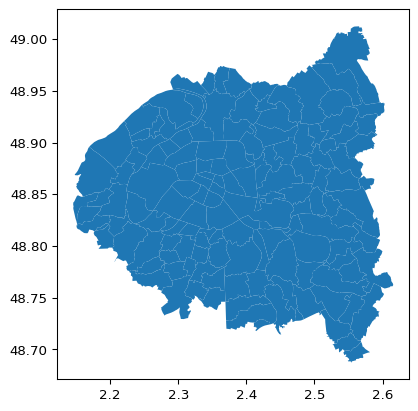

In [8]:
contours_villes_arrt.plot()

Pour voir le code permettant d’obtenir un `GeoDataFrame` équivalent sans
passer par `cartiflette`, vous pouvez vous rendre dans la partie
[Comment faire sans `cartiflette` ?](#sans-cartiflette). La section
[Bilan](#bilan) fournit quelques éléments de comparaison entre
l’approche avec et celle sans `cartiflette` (temps de traitement, volume
de données téléchargées, nombre de lignes de codes, etc.).

## 2.2 Le reste du travail après avoir utilisé `cartiflette`

La suite du travail n’est pas intrinsèquement lié à `cartiflette` mais
correspond à de la manipulation de données spatiales.

Comme nous avons besoin de localiser les stations dans les
arrondissements, nous faisons une jointure spatiale entre notre fonds de
carte et nos données Vélib

In [9]:
stations_info = gpd.sjoin(
    stations, contours_villes_arrt, predicate="within"
)

Outre la localisation des stations au niveau communes ou arrondissement,
cela permet d’ajouter une ribambelle de métadonnées (des informations
annexes) à nos données initiales:

2 rows × 33 columns

Le décompte des stations par communes et arrondissements se fait alors
assez aisément en utilisant la grammaire `Pandas`. Pour cela, il est
possible d’utiliser la variable `INSEE_COG` construite par `cartiflette`
pour consolider les codes communes des arrondissements et des
communes[1]

[1] La variable `INSEE_COM` correspond au code officiel géographique au
niveau communal. La valeur est donc identique pour les 20
arrondissements parisiens.

In [11]:
comptes = (
    stations_info
    .groupby("INSEE_COG")
    .agg({"capacity": "sum"})
    .reset_index()
)

Enfin, il ne reste plus qu’à construire la variable d’intérêt, ce qui
n’est pas du travail lié à `cartiflette`:

In [12]:
import pandas as pd

# Conversion des variables
contours_villes_arrt["INSEE_COG"] = contours_villes_arrt["INSEE_COG"].astype(str)
comptes["INSEE_COG"] = comptes["INSEE_COG"].astype(str)

# Jointure pour retrouver la dimension géographique de nos données agrégées
comptes_velib_by_city_arrt = contours_villes_arrt.merge(
    comptes, how = "inner", on = "INSEE_COG"
)
comptes_velib_by_city_arrt['densite'] = comptes_velib_by_city_arrt['capacity']

# Création des variables pour la taille de nos ronds proportionnels
df_points = comptes_velib_by_city_arrt.copy()

df_points["markersize"] = 12*df_points["densite"].div(comptes_velib_by_city_arrt.to_crs(2154).area.div(10**6).sum())

bins = [-float('inf'), 20, 100, 500, float('inf')]
labels = ["Moins de 20", "Entre 20 et 100", "Entre 100 et 500", "Plus de 500"]

df_points["markercolor"] = pd.cut(
    df_points['densite'], bins=bins, labels=labels, right=True
)

# Centre de nos cercles
df_points["geometry"] = df_points["geometry"].centroid

Finalement, on obtient la carte avec le code suivant

``` python
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the base map
comptes_velib_by_city_arrt.plot(
    ax=ax,
    color="lightgray",
    edgecolor="grey",
    linewidth=0.4,
    alpha=0.3
)

# Plot the points with customized colors and sizes
df_points.plot(
    ax=ax,
    column="markercolor",
    markersize="markersize",
    alpha=0.7,
    legend=True,
    legend_kwds={"loc": "upper center", "ncol": 2, "bbox_to_anchor": (0.5, 0.05)},
    cmap="viridis",
)

# Plot the department boundaries
departements.boundary.plot(ax=ax, edgecolor="black", alpha=0.3)

# Remove axes and set the title
ax.axis("off")
ax.set_title("Densité de population dans la petite couronne")

# Customize the legend title
ax.get_legend().set_title("Nombre de vélib par km²")

# Add source text
plt.figtext(
    0.3,
    0.15,
    "Source: IGN - AdminExpress",
    wrap=True,
    horizontalalignment="center",
    fontsize=8,
    style="italic",
)

# Show the final plot
plt.show()
```

<figure id="fig-map">
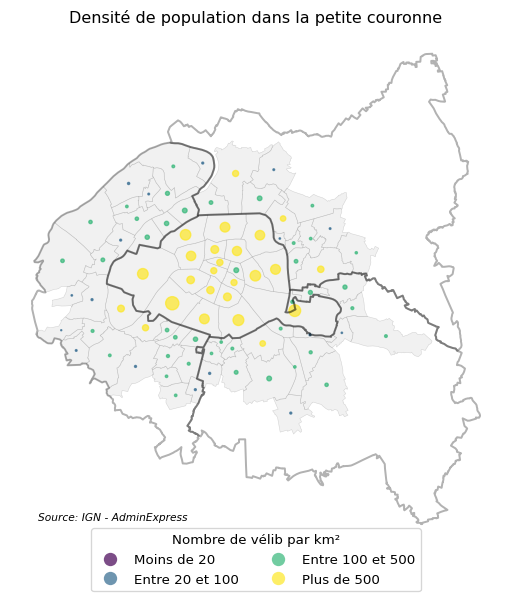
<figcaption>Figure 1: Carte obtenue à l’issue de ce
tutoriel</figcaption>
</figure>

# 3. Comment faire sans `cartiflette` ?

L’approche est nettement plus fastidieuse sans `cartiflette`. Pour
obtenir les mêmes données, prêtes à l’emploi, cela passe par quatre
étapes principales:

-   1️⃣ Télécharger les données et les enregistrer sur le disque, en
    local.
-   2️⃣ Dézipper la version téléchargée (le format est une archive 7z) et
    enregistrer l’arborescence obtenue sur le disque.
-   3️⃣ Importer les bons *shapefile* dans `Python`.
-   4️⃣ Créer le fonds de carte consolidé en se restreignant aux
    départements d’intérêt pouis en retirant la commune de Paris et en y
    apposant, à la place, les arrondissements.

La première étape consiste donc à télécharger le fichier depuis le site
de mise à disposition de l’IGN. L’archive étant assez volumineuse, le
code proposé propose une barre de progrès pour s’assurer que le
téléchargement progresse.

Le code étant assez long, il n’est pas apparent par défaut mais il
suffit de cliquer ci-dessous:

``` python
import os
import requests
import py7zr
from tqdm import tqdm

# Step 1: Download the file with progress bar
url = "https://data.geopf.fr/telechargement/download/ADMIN-EXPRESS-COG-CARTO/ADMIN-EXPRESS-COG-CARTO_3-1__SHP_WGS84G_FRA_2022-04-15/ADMIN-EXPRESS-COG-CARTO_3-1__SHP_WGS84G_FRA_2022-04-15.7z"
file_name = url.split("/")[-1]

def download_7z_archive(file_name):
    if os.path.exists(file_name) is False:
        # Streaming download with progress bar
        print("Downloading file...")
        response = requests.get(url, stream=True)
        total_size = int(response.headers.get('content-length', 0))

        with open(file_name, 'wb') as file, tqdm(
                desc=file_name,
                total=total_size,
                unit='iB',
                unit_scale=True,
                unit_divisor=1024,
            ) as bar:
            for chunk in response.iter_content(chunk_size=8192):
                size = file.write(chunk)
                bar.update(size)

        print(f"Downloaded {file_name}")
        return file_name
    else:
        print("File exists, please delete it before going further")

download_7z_archive(file_name)
```

Listing 2: 1️⃣ Code pour télécharger les données

La deuxième étape consiste à dézipper la version téléchargée en local

``` python
def extract_7z_archive(
    file_name, output_dir = "extracted_files"
):
    # Step 2: Extract the .7z file
    os.makedirs(output_dir, exist_ok=True)

    print("Extracting the file...")
    with py7zr.SevenZipFile(file_name, mode='r') as z:
        z.extractall(path=output_dir)
    print(f"Extracted to {output_dir}")
    return output_dir

extract_7z_archive(file_name)
```

Listing 3: 2️⃣ Dézipper la version téléchargée

La troisième étape consiste à importer les fonds de carte désirés. Le
piège à cette étape est qu’il existe deux fonds de carte
d’arrondissements: les arrondissements départementaux(subdivisions
départementales) et les arrondissements municipaux (subdivisions des
trois plus grandes villes françaises). Ce sont ces derniers qui nous
intéressent. Ils sont livrés sous le nom de fichier
`ARRONDISSEMENT_MUNICIPAL` (à ne pas confondre avec `ARRONDISSEMENT` qui
correspond aux arrondissements départementaux).

Les données sont livrées au format *shapefile*, un format propriétaire
bien connu des spécialistes des SIG. Moins pratique que le GeoJSON pour
les utilisateurs de `Python`, il est tout de même possible de le lire
directement avec `GeoPandas`

``` python
path_extraction = "./extracted_files/ADMIN-EXPRESS-COG-CARTO_3-1__SHP_WGS84G_FRA_2022-04-15/ADMIN-EXPRESS-COG-CARTO/1_DONNEES_LIVRAISON_2022-04-15/ADECOGC_3-1_SHP_WGS84G_FRA/"

# Limites communales
city_shapefile = gpd.read_file(f"{path_extraction}/COMMUNE.shp")

# Arrondissements
arrondissement_shapefile = gpd.read_file(f"{path_extraction}/ARRONDISSEMENT_MUNICIPAL.shp")

# Départements
departements_shapefile = gpd.read_file(f"{path_extraction}/DEPARTEMENT.shp")
```

Listing 4: 3️⃣ Importer le bon shapefile dans Python

La 4e et dernière étape, la plus propice à faire des erreurs, est celle
qui consiste à restreindre les données à notre aire d’intérêt et à
superposer les masques du fonds des arrondissements municipaux avec
celui des communes.

``` python
import pandas as pd

# 1. Filtrer les données à l'emprise désirée
city_shapefile = city_shapefile.loc[
    city_shapefile['INSEE_DEP'].isin(["75", "92", "93", "94"])
]
arrondissement_shapefile = arrondissement_shapefile.loc[
    arrondissement_shapefile['INSEE_COM'].str[:2] == "75"
]

# 2. Préparer la superposition des fonds de carte
city_shapefile = (
    city_shapefile
    .loc[city_shapefile["INSEE_DEP"] != "75"]
)
city_shapefile['INSEE_COG'] = city_shapefile['INSEE_COM']
arrondissement_shapefile['INSEE_COG'] = arrondissement_shapefile['INSEE_COM']
arrondissement_shapefile['INSEE_COM'] = "75056"

geodataframe_cartiflette_like = pd.concat(
    [city_shapefile, arrondissement_shapefile]
)
```

Lines 16-17  
On crée les variables `INSEE_COG` et `INSEE_COM` pour avoir des
identifiants de localisation équivalents à ceux de `cartiflette`

Line 18  
Code commune de la ville de Paris

Listing 5: 4️⃣ Consolider pour obtenir le fonds de carte désiré

# 4. Bilan

Si le fait qu’il suffise que le code de `cartiflette` se réduise à
<a href="#lst-cartiflette-example" class="quarto-xref">Listing 1</a>
contre <a href="#lst-example-download-adminexpress"
class="quarto-xref">Listing 2</a>,
<a href="#lst-example-unzip-adminexpress"
class="quarto-xref">Listing 3</a>,
<a href="#lst-example-open-adminexpress"
class="quarto-xref">Listing 4</a>,
<a href="#lst-example-merge-adminexpress"
class="quarto-xref">Listing 5</a> pour obtenir un résultat équivalent ne
suffit pas, si le fait que le *GeoDataFrame* obtenu avec `cartiflette`
comporte plus de métadonnées que celui créé sans ce *package* n’est pas
non plus suffisant, la suite déroule quelques arguments supplémentaires
de l’intérêt d’utiliser `cartiflette`.

## 4.1 Volume de données téléchargées

In [20]:
# Convert to a human-readable format (e.g., MB, GB)
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s} {size_name[i]}"

In [21]:
import math
import os
from pathlib import Path

# Path to the zipped file
zipped_file = "ADMIN-EXPRESS-COG-CARTO_3-1__SHP_WGS84G_FRA_2022-04-15.7z"

# Get the size of the zipped file in bytes
zipped_size = os.path.getsize(zipped_file)

# Path to the directory containing unzipped files
unzipped_dir = "./extracted_files"

root_directory = Path(unzipped_dir)
size_dir = sum(f.stat().st_size for f in root_directory.glob('**/*') if f.is_file())

poids_archive_compressee = convert_size(zipped_size)
poids_archive_decompressee = convert_size(size_dir)

In [22]:
writedir = "cartiflette-data/usecase1"
os.makedirs(writedir, exist_ok=True)
contours_villes_arrt.to_file(
    f"{writedir}/contours.shp"
)

poids_archive_cartiflette_bytes = os.path.getsize(f"{writedir}/contours.shp")
poids_archive_cartiflette = convert_size(
    poids_archive_cartiflette_bytes
)

La première base de comparaison possible est la taille sur disque des
fonds de carte récupérés par `cartiflette` ou sans passer par ce
*package*. Le code ci-dessus ☝️ permet de construire les statistiques
suivantes:

-   Les données `cartiflette` représenteraient **182.23 KB** si elles
    étaient stockées sur disque.
-   Sans passer par `cartiflette`, on a besoin de **240.67 MB** pour
    stocker les fonds de carte décompressés auxquels il faut ajouter
    142.86 MB pour stocker l’archive compressée.

Autrement dit, les données récupérées sans `cartiflette` représentent
**2155 fois** le volume de celles exclusivement nécessaires pour cette
carte.

L’arborescence du dossier décompressé est également assez conséquente:
nous avons 68 fichiers. L’arborescence complète obtenue sans
`cartiflette` est disponible ci-dessous. Avec `cartiflette` aucun
fichier n’est écrit sur disque, tout est directement accessible dans la
session `Python`.

Arborescence complète

extracted_files/
└── ADMIN-EXPRESS-COG-CARTO_3-1__SHP_WGS84G_FRA_2022-04-15/
    ├── ADMIN-EXPRESS-COG-CARTO/
    │   ├── 1_DONNEES_LIVRAISON_2022-04-15/
    │   │   ├── ADECOGC_3-1_SHP_WGS84G_FRA/
    │   │   │   ├── ARRONDISSEMENT.cpg
    │   │   │   ├── ARRONDISSEMENT.dbf
    │   │   │   ├── ARRONDISSEMENT.prj
    │   │   │   ├── ARRONDISSEMENT.shp
    │   │   │   ├── ARRONDISSEMENT.shx
    │   │   │   ├── ARRONDISSEMENT_MUNICIPAL.cpg
    │   │   │   ├── ARRONDISSEMENT_MUNICIPAL.dbf
    │   │   │   ├── ARRONDISSEMENT_MUNICIPAL.prj
    │   │   │   ├── ARRONDISSEMENT_MUNICIPAL.shp
    │   │   │   ├── ARRONDISSEMENT_MUNICIPAL.shx
    │   │   │   ├── CANTON.cpg
    │   │   │   ├── CANTON.dbf
    │   │   │   ├── CANTON.prj
    │   │   │   ├── CANTON.shp
    │   │   │   ├── CANTON.shx
    │   │   │   ├── CHFLIEU_ARRONDISSEMENT_MUNICIPAL.cpg
    │   │   │   ├── CHFLIEU_ARRONDISSEMENT_MUNICIPAL.dbf
    │   │   │   ├── CHFLIEU_ARRONDISSEMENT_MUNICIPAL.prj
    │   │   │   ├── CHFLIEU_ARRONDIS

## 4.2 Nombre de lignes de code

La récupération des données avec cartiflette ne demande que 13 lignes de
code contre 78 sans cartiflette

## 4.3 Temps de traitement

Le code `cartiflette` permet de récupérer les éléments contextuels
nécessaires en 4 secondes. Sans `cartiflette`, il faut 6 secondes. Sans
`cartiflette`, soit un rapport de 1 à 2 pour cette tâche.